### State of (open-source) Deep Learning, in Python:
- 2 most popular frameworks:
    - Tensorflow (Google) ~2015
        - Keras (Google) ~2015
    - PyTorch (Facebook) ~2016

As of 2020, Keras library is now directly part of TensorFlow
- i.e. ``import tensorflow.keras``

## 1. Install Tensorflow:

1. Switch to that environment:
   - `conda activate deep_learning`
2. Install Jupyter within that environment:
   - `conda install -c conda-forge jupyterlab`
   - or `pip install jupyter`
3. Launch Jupyter from within that environment.
   - `jupyter lab`
   - or `jupyter notebook`

In [1]:
# Import tensorflow.keras
import tensorflow.keras

In [4]:
# Check if you are in the right environment
!which jupyter

/Users/stefanroth/anaconda3/envs/deep_learning/bin/jupyter


## 2. Other Options:

Other options:

1. install tensorflow via `conda install -c conda-forge tensorflow`


2. Use Docker - https://www.tensorflow.org/install/docker
    - e.g. `docker run -it -p 8888:8888 tensorflow/tensorflow:nightly-jupyter`
   
   
3. Use Cloud-Based Alternatives:
   - Google Colab: https://colab.research.google.com/
       - Run notebooks right in the cloud. 
       - Comes with GPU Support.
   - PaperSpace Gradient: https://gradient.paperspace.com/
   

---

### Making Neural Networks in Tensorflow / Keras

In [5]:
# Install some other libraries we will need
!pip install --no-input scikit-learn
!pip install --no-input matplotlib
!pip install --no-input pandas
!pip install --no-input seaborn

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = (12,6)

In [7]:
# Import the practice dataset
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=500, noise=0.2, random_state=42)

<AxesSubplot:>

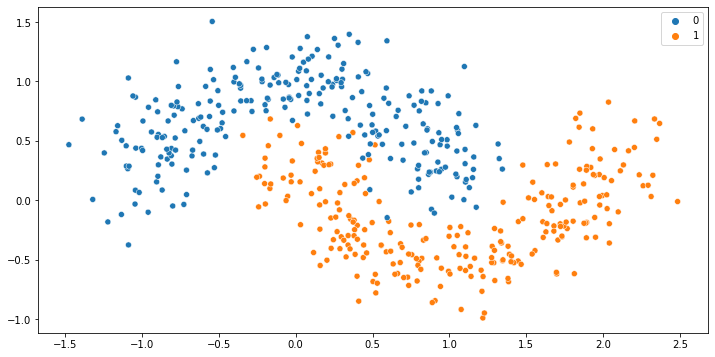

In [8]:
# Create a scatterplot
sns.scatterplot(x=X[:,0], y=X[:,1], hue=y)

In [10]:
# Inspect the shape of X
X.shape

(500, 2)

In [11]:
# Inspect the shape of y
y.shape

(500,)

**Making a Feed-Forward Network**

In [12]:
# Import the Sequential model in Tensorflow
from tensorflow.keras.models import Sequential

# Import the Dense layer
from tensorflow.keras.layers import Dense

In [13]:
# Understand the input shape of each single entry in X
X[0].shape

(2,)

In [14]:
X[0]

array([ 0.83085779, -0.33434228])

In [15]:
# Define the model - instantiate and object of the class Sequential
m = Sequential(
        [Dense(units=2, activation='sigmoid', input_shape=(2,)),
         # units: #_of_neurons, activatin: activation function, input_shape: shape of each
         # datapoint
         Dense(units=1, activation='sigmoid')
        ]
)

# input shape is always defined in the first layer
# afterwards Keras knows 

In [16]:
# Look at the summary of the model
m.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 2)                 6         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 3         
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


**At this point, in sklearn, we would jump straight to m.fit()**
- But in Keras, there's one extra step:
    - compilation: compiling the python code you wrote into lower-level c++ code for better performance.

In [18]:
m.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

# optimizer: algorithm that finds the minimum of the loss function
# loss: the loss function to be optimized; we choose the loss function depending on the 
# problem we are solving
# metrics: metrics to be tracked over training

**Now we can train**: 🚃
- we can save our fitting history to our variable

In [19]:
history = m.fit(X, y, batch_size=32, epochs=100, validation_split=0.2)
# batch_size: In Deep Learning you usually don't train your model on the whole dataset at once
# The batch_size determines how many data points you train on at once before going on to the next batch
# epochs: How often do we repeat the training on the whole training data; similar to max_iter in an sklearn model
# validation_split: Determines which fraction of the data is used as a validation set

Epoch 1/100
13/13 [==============================] - 1s 18ms/step - loss: 0.6848 - accuracy: 0.5812 - val_loss: 0.6886 - val_accuracy: 0.5300
Epoch 2/100
13/13 [==============================] - 0s 4ms/step - loss: 0.6835 - accuracy: 0.5362 - val_loss: 0.6878 - val_accuracy: 0.5200
Epoch 3/100
13/13 [==============================] - 0s 4ms/step - loss: 0.6804 - accuracy: 0.5423 - val_loss: 0.6872 - val_accuracy: 0.5100
Epoch 4/100
13/13 [==============================] - 0s 5ms/step - loss: 0.6829 - accuracy: 0.5072 - val_loss: 0.6866 - val_accuracy: 0.5000
Epoch 5/100
13/13 [==============================] - 0s 6ms/step - loss: 0.6820 - accuracy: 0.4875 - val_loss: 0.6859 - val_accuracy: 0.4900
Epoch 6/100
13/13 [==============================] - 0s 5ms/step - loss: 0.6791 - accuracy: 0.4989 - val_loss: 0.6854 - val_accuracy: 0.4800
Epoch 7/100
13/13 [==============================] - 0s 5ms/step - loss: 0.6784 - accuracy: 0.5049 - val_loss: 0.6846 - val_accuracy: 0.4800
Epoch 8/100


Epoch 59/100
13/13 [==============================] - 0s 4ms/step - loss: 0.6100 - accuracy: 0.7393 - val_loss: 0.6176 - val_accuracy: 0.7400
Epoch 60/100
13/13 [==============================] - 0s 4ms/step - loss: 0.6111 - accuracy: 0.7105 - val_loss: 0.6158 - val_accuracy: 0.7400
Epoch 61/100
13/13 [==============================] - 0s 4ms/step - loss: 0.6037 - accuracy: 0.7445 - val_loss: 0.6140 - val_accuracy: 0.7400
Epoch 62/100
13/13 [==============================] - 0s 4ms/step - loss: 0.6122 - accuracy: 0.7299 - val_loss: 0.6122 - val_accuracy: 0.7400
Epoch 63/100
13/13 [==============================] - 0s 4ms/step - loss: 0.6102 - accuracy: 0.7331 - val_loss: 0.6104 - val_accuracy: 0.7500
Epoch 64/100
13/13 [==============================] - 0s 4ms/step - loss: 0.5994 - accuracy: 0.7518 - val_loss: 0.6087 - val_accuracy: 0.7500
Epoch 65/100
13/13 [==============================] - 0s 4ms/step - loss: 0.6000 - accuracy: 0.7400 - val_loss: 0.6070 - val_accuracy: 0.7500
Epoch 

**And plot the results!**

In [35]:
type(history)

tensorflow.python.keras.callbacks.History

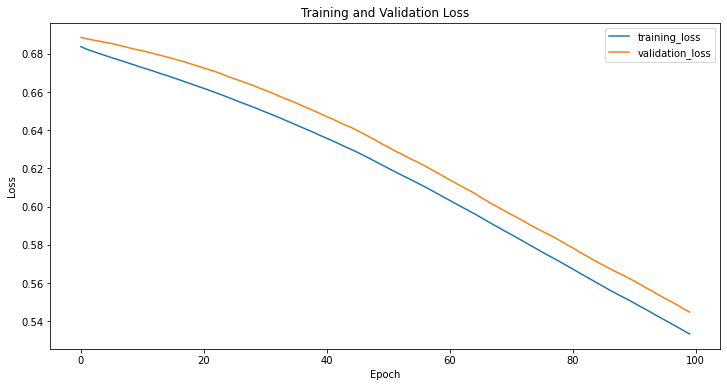

In [22]:
plt.plot(history.history['loss'], label='training_loss')
plt.plot(history.history['val_loss'], label='validation_loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

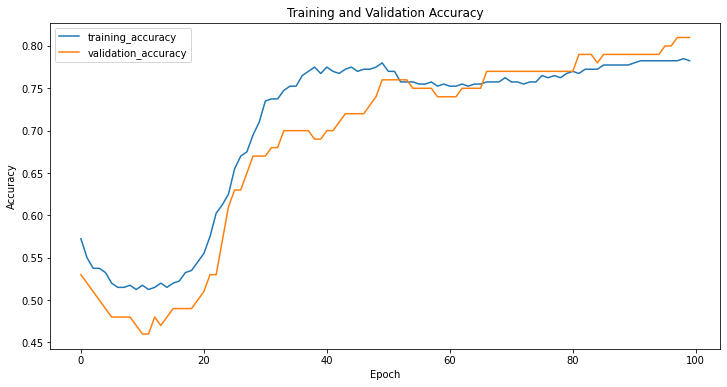

In [23]:
plt.plot(history.history['accuracy'], label='training_accuracy')
plt.plot(history.history['val_accuracy'], label='validation_accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [24]:
# Evaluate the model
m.evaluate(X, y)

16/16 [==============================] - 0s 804us/step - loss: 0.5348 - accuracy: 0.7880


[0.5347837209701538, 0.7879999876022339]

In [25]:
# Make predictions
m.predict(X)

array([[0.5929246 ],
       [0.4990587 ],
       [0.6252575 ],
       [0.31645492],
       [0.35922155],
       [0.63846534],
       [0.61727077],
       [0.33212066],
       [0.4498827 ],
       [0.65190786],
       [0.5881756 ],
       [0.31279343],
       [0.65649855],
       [0.38821307],
       [0.6409352 ],
       [0.6376779 ],
       [0.64596367],
       [0.536983  ],
       [0.5927651 ],
       [0.652289  ],
       [0.645374  ],
       [0.6521692 ],
       [0.3613924 ],
       [0.6079581 ],
       [0.44078225],
       [0.62275255],
       [0.63196564],
       [0.28627688],
       [0.3392691 ],
       [0.5277953 ],
       [0.6540316 ],
       [0.50650996],
       [0.6592381 ],
       [0.29013568],
       [0.55927   ],
       [0.56142616],
       [0.6216857 ],
       [0.4806075 ],
       [0.27430236],
       [0.45420584],
       [0.6470511 ],
       [0.33267254],
       [0.6296726 ],
       [0.28761852],
       [0.55245304],
       [0.47495234],
       [0.59523094],
       [0.578

In [27]:
# Inspect the weights of the Neural Network
m.get_weights()[0]

array([[ 1.4682807 , -1.6668885 ],
       [-0.08525697,  1.3401841 ]], dtype=float32)

In [28]:
m.get_weights()[1]

array([0.04976303, 0.28972796], dtype=float32)

In [29]:
m.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 2)                 6         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 3         
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


In [31]:
m.

### Where to Begin Practicing: MNIST

In [32]:
from tensorflow.keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

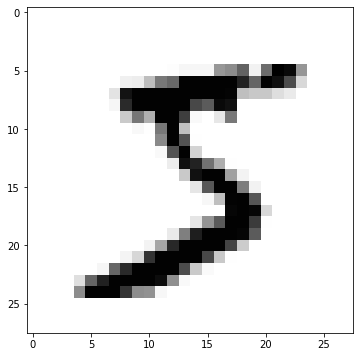

In [33]:
# Show the first image
plt.imshow(X_train[0], cmap=plt.cm.Greys)

In [34]:
# Show the first y value
y_train[0]

5

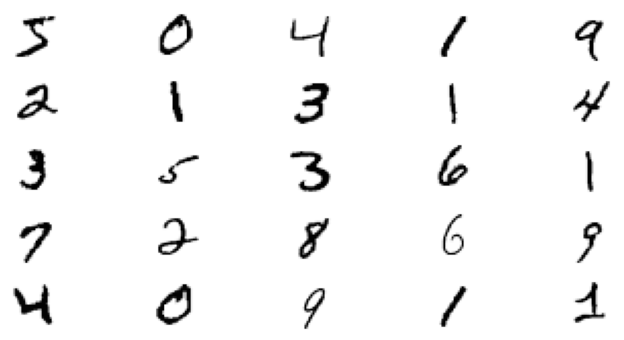

In [36]:
# Plot the first 25 digits
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(X_train[i], cmap=plt.cm.Greys)
    plt.axis('off')

In [39]:
# Inspect the shape of X
X_train.shape

# 60_000: Nr. of handwritten digits in the dataset; size of the dataset
# 28*28: image is 28 * 28 pixels

(60000, 28, 28)

In [40]:
# Inspect the shape of y
y_train.shape

(60000,)

In [41]:
# Look at the shape of a single image
X_train[0].shape

(28, 28)

In [44]:
X_train.reshape(60000, 784).shape

(60000, 784)

In [46]:
X_train.reshape(60000, -1)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [47]:
# We want the input image to be a flat array.
# Flatten the input
X_train = X_train.reshape(60000, -1)
X_train.shape

(60000, 784)

In [48]:
# Understand what it means to flatten the images
import pandas as pd
pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Let's build a model

There will be two intricacies you have to take care of.

1. Defining the right input shape
2. Dealing with the shape of y

In [ ]:
# input_shape of first layer has to be (784,)

In [49]:
from tensorflow.keras.utils import to_categorical

In [51]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [52]:
# Before passing y_train into the model
y_train = to_categorical(y_train) # one-hot-encode the y values

In [54]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [ ]:
# loss='categorical_crossentropy'

In [56]:
mnist = Sequential([
    Dense(units=10, activation='sigmoid', input_shape=(784,)), # 10 neurons in the hidden layer is arbitrary
    Dense(units=10, activation='softmax') # 10 neurons in the output layer because we have 10 classes /digits
])

In [57]:
mnist.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [58]:
mnist_hist = mnist.fit(X_train, y_train, batch_size=32, epochs=100, validation_split=0.2)

Epoch 1/100
1500/1500 [==============================] - 2s 1ms/step - loss: 1.6952 - accuracy: 0.4959 - val_loss: 0.8088 - val_accuracy: 0.8056
Epoch 2/100
1500/1500 [==============================] - 1s 927us/step - loss: 0.7723 - accuracy: 0.7966 - val_loss: 0.5982 - val_accuracy: 0.8422
Epoch 3/100
1500/1500 [==============================] - 1s 932us/step - loss: 0.6060 - accuracy: 0.8324 - val_loss: 0.5286 - val_accuracy: 0.8522
Epoch 4/100
1500/1500 [==============================] - 1s 901us/step - loss: 0.5382 - accuracy: 0.8499 - val_loss: 0.4965 - val_accuracy: 0.8642
Epoch 5/100
1500/1500 [==============================] - 1s 899us/step - loss: 0.5103 - accuracy: 0.8572 - val_loss: 0.5291 - val_accuracy: 0.8461
Epoch 6/100
1500/1500 [==============================] - 1s 951us/step - loss: 0.5264 - accuracy: 0.8499 - val_loss: 0.4635 - val_accuracy: 0.8671
Epoch 7/100
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4916 - accuracy: 0.8611 - val_loss: 0.481

1500/1500 [==============================] - 2s 1ms/step - loss: 0.3975 - accuracy: 0.8857 - val_loss: 0.3938 - val_accuracy: 0.8890
Epoch 58/100
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3980 - accuracy: 0.8874 - val_loss: 0.3934 - val_accuracy: 0.8871
Epoch 59/100
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3871 - accuracy: 0.8886 - val_loss: 0.4040 - val_accuracy: 0.8882
Epoch 60/100
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4111 - accuracy: 0.8822 - val_loss: 0.4040 - val_accuracy: 0.8822
Epoch 61/100
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3982 - accuracy: 0.8858 - val_loss: 0.4137 - val_accuracy: 0.8815
Epoch 62/100
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4016 - accuracy: 0.8812 - val_loss: 0.4036 - val_accuracy: 0.8861
Epoch 63/100
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3954 - accuracy: 0.8876 - val_loss: 0.4022 - val_accuracy

### Mini-Projects this Week:
- Neural Network From Scratch
- Classifying Handwritten Digits (MNIST)
    - Fashion MNIST: https://github.com/zalandoresearch/fashion-mnist
- Transfer Learning for Image Recognition
    - Up to you!